Imports

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

Prepare DATASET

In [2]:

train = ImageDataGenerator(rescale=1/255,validation_split=0.2)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/all/train",
                                          target_size=(32,32),
                                          batch_size = 64,
                                          class_mode = 'binary',subset='training')

validation_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/all/train",
                                          target_size=(32,32),
                                          batch_size = 64,
                                          class_mode = 'binary',subset='validation')                                    
test_dataset = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/all/test",
                                          target_size=(32,32),
                                          batch_size =64,
                                          class_mode = 'binary')

test_dataset.class_indices

Found 2560 images belonging to 2 classes.
Found 640 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


{'SNGAN_all_test': 0, 'imagewoof_test': 1}

Design Model

In [3]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,3,activation='relu',input_shape=(32,32,3)))
# model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(4,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))
# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
# model.add(keras.layers.Dense(32,activation='relu'))

# Output layer with single neuron which gives 0 for fake or 1 for real 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-10 23:03:55.679190: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-10 23:03:55.679308: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Training

Usually with every epoch increasing, loss goes lower and accuracy goes higher. But with val_loss and val_acc, many cases can be possible:

val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)

In [4]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(train_dataset,
        #  steps_per_epoch = 80,
         epochs = 200,
         callbacks=[early_stopping],
         validation_data = validation_dataset
         )

Epoch 1/200


2022-07-10 23:03:55.819524: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-10 23:03:56.103478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 13ms/step - loss: 0.5917 - accuracy: 0.7383 - val_loss: 0.5749 - val_accuracy: 0.7500
Epoch 2/200
 7/40 [====>.........................] - ETA: 0s - loss: 0.6130 - accuracy: 0.7143

2022-07-10 23:03:56.784301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 0s 11ms/step - loss: 0.5620 - accuracy: 0.7500 - val_loss: 0.5567 - val_accuracy: 0.7500
Epoch 3/200
40/40 [==============================] - 0s 11ms/step - loss: 0.5383 - accuracy: 0.7527 - val_loss: 0.5321 - val_accuracy: 0.7594
Epoch 4/200
40/40 [==============================] - 0s 11ms/step - loss: 0.5141 - accuracy: 0.7641 - val_loss: 0.5097 - val_accuracy: 0.7703
Epoch 5/200
40/40 [==============================] - 0s 11ms/step - loss: 0.4898 - accuracy: 0.7781 - val_loss: 0.4912 - val_accuracy: 0.7719
Epoch 6/200
40/40 [==============================] - 0s 11ms/step - loss: 0.4741 - accuracy: 0.7902 - val_loss: 0.4735 - val_accuracy: 0.7922
Epoch 7/200
40/40 [==============================] - 0s 11ms/step - loss: 0.4517 - accuracy: 0.7949 - val_loss: 0.4586 - val_accuracy: 0.8000
Epoch 8/200
40/40 [==============================] - 0s 11ms/step - loss: 0.4371 - accuracy: 0.8055 - val_loss: 0.4440 - val_accuracy: 0.8156
Epoch 9/200
40/40 

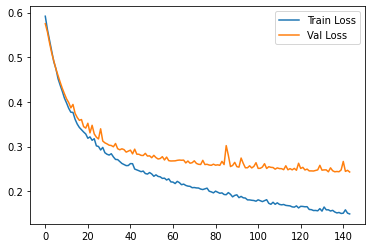

In [6]:
# visualizing losses and accuracy
# print(history.history)
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']
xc         = range(144)


plt.figure()
plt.plot(xc, train_loss,label = 'Train Loss')
plt.plot(xc, val_loss,label = 'Val Loss')
plt.legend(loc='upper right')

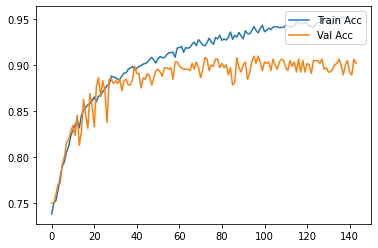

In [7]:
plt.figure()
plt.plot(xc, train_acc,label = 'Train Acc')
plt.plot(xc, val_acc,label = 'Val Acc')
plt.legend(loc='upper right')

In [8]:
_, acc = model.evaluate(test_dataset)
print('Trained with All Three')
print('All: ' ,acc *100)

test_dataset1 = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bilinear/test",
                                          target_size=(32,32),
                                          batch_size =64,
                                          class_mode = 'binary')

_, acc = model.evaluate(test_dataset1)
print('Bilinear: ' ,acc *100)

test_dataset2 = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/test",
                                          target_size=(32,32),
                                          batch_size =64,
                                          class_mode = 'binary')

_, acc = model.evaluate(test_dataset2)
print('Bicubic: ' ,acc *100)

test_dataset3 = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/pixelsuffle/test",
                                          target_size=(32,32),
                                          batch_size =64,
                                          class_mode = 'binary')

_, acc = model.evaluate(test_dataset3)
print('Pixelsuffle: ' ,acc *100)

13/13 [==============================] - 0s 8ms/step - loss: 0.3067 - accuracy: 0.8762
Trained with All Three
All:  87.62499690055847
Found 400 images belonging to 2 classes.
7/7 [==============================] - 0s 8ms/step - loss: 0.4305 - accuracy: 0.8200
Bilinear:  81.99999928474426
Found 400 images belonging to 2 classes.
7/7 [==============================] - 0s 6ms/step - loss: 0.4473 - accuracy: 0.8175
Bicubic:  81.74999952316284
Found 400 images belonging to 2 classes.
7/7 [==============================] - 0s 6ms/step - loss: 0.4750 - accuracy: 0.8050
Pixelsuffle:  80.50000071525574


Prediction

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(32,32))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Real",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Fake",fontsize=30)

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/pixelsuffle/test/imagewoof_test/985.jpg")


In [ ]:

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/test/SNGAN_bicubic_test/860.jpg")